In [2]:
%matplotlib inline
# Dependencies and Setup
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Files
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
pyber1_df = pd.read_csv(city_data)
pyber1_df.head()

pyber2_df = pd.read_csv(ride_data)
pyber2_df.head()

# Combine the data into a single dataset
pyber_df = pd.merge(pyber1_df, pyber2_df, on="city")

# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
pyber_df.dtypes

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [4]:
#max range for variable
pyber_df["driver_count"].max()

73

In [5]:
#max range for variable
pyber_df["fare"].max()

58.55

In [6]:
#max range for variable
pyber_df["ride_id"].count()

2375

In [15]:
#Coordinates of "types"
#use loc method ? 
type_rural = pyber_df[pyber_df["type"] == "Rural"]
type_rural_rides = type_rural.groupby(["city"]).count()["ride_id"]
type_rural_drivers = type_rural.groupby(["city"]).max()["driver_count"]
type_rural_fare = type_rural.groupby(["city"]).mean()["fare"]
type_urban = pyber_df[pyber_df["type"] == "Urban"]
type_urban_rides = type_urban.groupby(["city"]).count()["ride_id"]
type_urban_drivers = type_urban.groupby(["city"]).max()["driver_count"]
type_urban_fare = type_urban.groupby(["city"]).mean()["fare"]
type_suburban = pyber_df[pyber_df["type"] == "Suburban"]
type_suburban_rides = type_suburban.groupby(["city"]).count()["ride_id"]
type_suburban_drivers = type_suburban.groupby(["city"]).max()["driver_count"]
type_suburban_fare = type_suburban.groupby(["city"]).mean()["fare"]


In [18]:
type_rural_rides

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

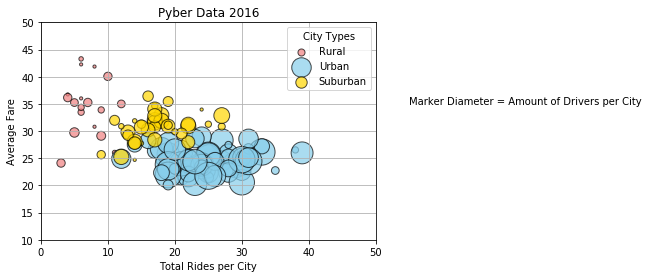

In [24]:
#Plot by city types 
Rural = plt.scatter(type_rural_rides, type_rural_fare, s=type_rural_drivers*10,
            facecolor="lightcoral", edgecolor = "black", linewidth=1, label="Rural", marker="o", alpha=.7)
Urban = plt.scatter(type_urban_rides, type_urban_fare, s=type_urban_drivers*10, 
            facecolor="skyblue", edgecolor = "black", linewidth=1, label="Urban", marker="o", alpha=.7)
Suburban = plt.scatter(type_suburban_rides, type_suburban_fare, s=type_suburban_drivers*10, 
            facecolor="gold", edgecolor = "black", linewidth=1, label = "Suburban", marker="o", alpha=.7)
#graph properties
#axis limits
plt.xlim(0,50)
plt.ylim(10,50)
plt.xlabel("Total Rides per City")
plt.ylabel("Average Fare")
plt.title("Pyber Data 2016")
plt.grid()

#legend
plt.legend(loc="best", title="City Types")



#3rd Variable description 
plt.text(55,35, "Marker Diameter = Amount of Drivers per City")
#save
plt.savefig("Pyber_Ride.png", bbox_inches="tight")

#show
plt.show()



## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

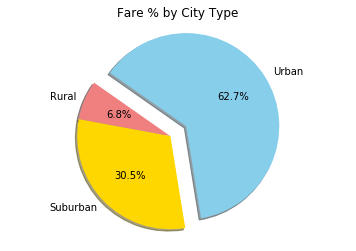

<Figure size 432x288 with 0 Axes>

In [22]:
# Calculate Type Percents
Percent = 100 * pyber_df.groupby(["type"]).sum()["fare"]/pyber_df["fare"].sum()

# Build Pie Chart
plt.pie(Percent, explode=(0,0,0.2), shadow=True, startangle=145, autopct="%1.1f%%",
       labels=["Rural", "Suburban", "Urban"],
       colors=["lightcoral","gold","skyblue"])

plt.axis("equal")
plt.title("Fare % by City Type")
plt.show()
plt.savefig("city_type_pie.png")



## Total Rides by City Type

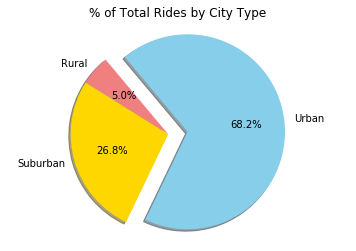

<Figure size 432x288 with 0 Axes>

In [28]:
# Calculate Ride Percents
Ride_Percent = 100 * pyber_df.groupby(["type"]).sum()["ride_id"]/pyber_df["ride_id"].count()

# Build Pie Chart
plt.pie(Ride_Percent, explode=(0,0,0.2), shadow=True, startangle=130, autopct="%1.1f%%",
       labels=["Rural", "Suburban", "Urban"],
       colors=["lightcoral","gold","skyblue"])

plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()
plt.savefig("city_type_rides_pie.png")
# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

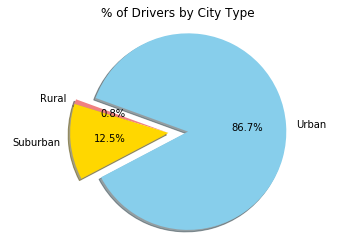

<Figure size 432x288 with 0 Axes>

In [33]:
# Calculate Driver Percents
Driver_Percent = 100 * pyber_df.groupby(["type"]).sum()["driver_count"]/pyber_df["driver_count"].count()

# Build Pie Charts
plt.pie(Driver_Percent, explode=(0,0,0.2), shadow=True, startangle=160, autopct="%1.1f%%", 
       labels=["Rural", "Suburban", "Urban"], 
       colors=["lightcoral", "gold", "skyblue"])
plt.axis("equal")
plt.title("% of Drivers by City Type")
plt.show()
plt.savefig("city_type_drivers_pie.png")

# Save Figure


In [ ]:
# Show Figure
plt.show()